<a href="https://colab.research.google.com/github/LaimengEung/inf-604-data-analysis-i-repo/blob/master/Copy_of_Lab3_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab3: Data Quality & Preprocessing**

**Course**: **INF-604: Data Analysis** <br>
**Lecturer**: **Sothea HAS, PhD**

-----

**Objective:** In this lab, you will delve deeper into assessing the quality of datasets and employing preprocessing techniques to properly clean them.

- You can work directly with `Google Colab` here: [Lab3_Preprocessing.ipynb](https://colab.research.google.com/drive/1xdcm_U8-C2LdJ-kph_aKOb9tnaq_xIwP?usp=sharing).


-----


# 1. `Food Delivery` Dataset

Let's consider Delivery dataset discussed in the previous [Lab2](https://hassothea.github.io/Data_Analysis_AUPP/Labs/Lab2_Univariate_Analysis.html). Read and load the data from kaggle: [Food Delivery Dataset](https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction/data).

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'food-delivery-time-prediction' dataset.
Path to dataset files: /kaggle/input/food-delivery-time-prediction


In [ ]:
# Navigate our working invironement to the correct path

%cd /root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1

%ls

/root/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1
Food_Delivery_Times.csv


In [ ]:
import pandas as pd

data = pd.read_csv(path + "/Food_Delivery_Times.csv")
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


**A. Overview:**

1. Drop the column `Order_ID`. What's the dimension of this dataset?

2. Compute statistical summary to briefly understand each individual column.

3. Visualize the distribution of each column and describe the graph briefly.

4. Address the problems related to the quality of this dataset.

--------------

In [ ]:
# To do
# 1. drop the column Order_ID
data = data.drop(columns='Order_ID')

In [ ]:
data.shape
# The dimension of the dataset is now (1000, 8): 1000 rows and 8 columns

(1000, 8)

In [ ]:
# 2. Compute stats summary
data.dtypes

,0
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


In [ ]:
# Quantitative Columns
data.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970.000000,1000.000000
mean,10.059970,16.982000,4.579381,56.732000
std,5.696656,7.204553,2.914394,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


In [ ]:
# Qualitative Columns
qual_cols = data.select_dtypes(exclude='number').columns

for var in qual_cols:
  print(f"\nRelative frequency of {var}")
  print(data[var].value_counts())


Relative frequency of Weather
Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Relative frequency of Traffic_Level
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

Relative frequency of Time_of_Day
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

Relative frequency of Vehicle_Type
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

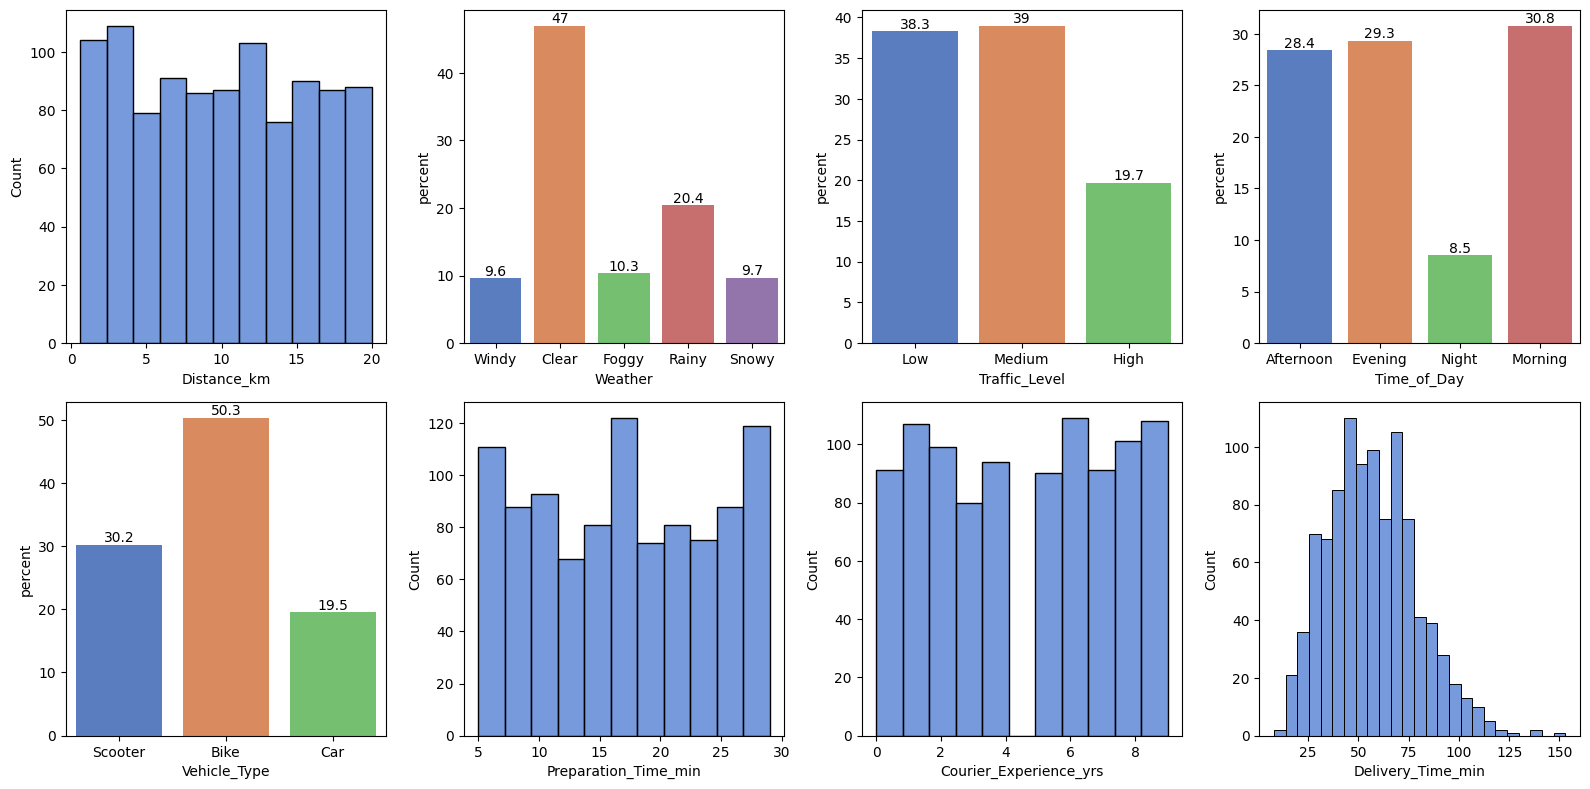

In [ ]:
# 3. Visualize each column
fig, ax = plt.subplots(2, 4, figsize=(16, 8))

for i, var in enumerate(data.columns):
  row = i // 4
  col = i % 4
  if var in qual_cols:
    sns.countplot(data=data, x=var, ax=ax[row, col], stat='percent', hue=var, palette='muted', legend=False)
    for container in ax[row, col].containers:
      ax[row, col].bar_label(container)
  else:
    sns.histplot(data=data, x=var, ax=ax[row, col])

plt.tight_layout()

## Describe the graph briefly:
### Quantitative columns:
> - Distance_km: distance ranged from about 0.6km to 20km, and the distribution is kinda balanced, although the most is at about 0.6km to 5km.
> - Preparation_Time_min: prep time ranged from 5mns to 29mns, and we can see there are 2 peaks at around 16-18mns, and 26-29mns.
> - Courier_Experience_yrs: although it is clear that there is a gap between 4~ to ~5 yr, that is only due to the graph bin not equally equals 1 (one) year. The data consists of only round numbers. Apart from that, year of experience seems to be fairly balanced. But then again... it depends on the bin width (whole bin width of 1 would have shown better viz).
> - Deliver_Time_min: delivery time mostly falls within 25 to 70 mins, with the most occurance being around 50 mins. Long delivery times over 80 mins occurs very little.

### Qualitative columns:
> - Weather: It is Clear that 'Clear' weather (xD) has the most proportion, accounted for almost half of the total, followed by Rainy at 20%, and Foggy, Snowy, Windy, all at around 10%.
> - Traffic_Level: guess the delivery wasn't done in a city like PP, cuz mostly the traffic is Medium or Low, while High only happens about 20% of the time.
> - Time_of_Day: Sounds reasonable that almost all orders were made in morning, afternoon, and evening all accounting for about 30%, while only a small portion ordered at night.
> - Vehicle_Type: again, doesn't sound like a city like PP, cuz half of the deliveries were done via bike, followed by scooter, and car, with 10% difference to each another.

In [ ]:
# 4. Address the problem to the dataset
  # Let's see if it has missing values
data.isna().sum() * 100 / data.shape[0]

,0
Distance_km,0.0
Weather,3.0
Traffic_Level,3.0
Time_of_Day,3.0
Vehicle_Type,0.0
Preparation_Time_min,0.0
Courier_Experience_yrs,3.0
Delivery_Time_min,0.0


In [ ]:
data[data['Weather'].isna() & data['Traffic_Level'].isna() & data['Time_of_Day'].isna() & data['Courier_Experience_yrs'].isna()]

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min


> There are equally 3% of missing data in 4 columns<br>However, it seems as though the missing are not the same in each of the 4 columns.<br>This means that there are in fact 12% (4 * 3%) missing values.

**B. Handling Missing Data:**

You already visualized all the columns of this dataset in the previous section. We're now studying the nature of the missing values.

1. Compute the percentage of missing values within each column.

2. Create two lists:
    - `NA_list`: a list containing all the names of columns with missing values.
    - `NoNA_list`: a list containing all the names of columns without missing values.

3. Show the distribution of each column in `NoNA_list`, both before and after removing missing values based on `NA_list`.

4. Compute the statistical summary of each column in `NoNA_list`, both before and after removing missing values based on `NA_list`.

5. Deduce the nature of the missing values (e.g., **MCAR**, **MAR**, or **MNAR**)?

6. Can you explain the main reasoning that may lead to this conclusion?

7. How would you handle this missing values based on your conclusion?

In [ ]:
# data.drop(columns=['Order_ID'], inplace=True)

data.isna().sum()/data.shape[0] * 100

,0
Distance_km,0.0
Weather,3.0
Traffic_Level,3.0
Time_of_Day,3.0
Vehicle_Type,0.0
Preparation_Time_min,0.0
Courier_Experience_yrs,3.0
Delivery_Time_min,0.0


In [ ]:
# 2. Create 2 lists
NA_list = [var for var in data.columns if data[var].isna().any()] # .any(): method for Series to check if at least one element in that Series is True
NoNA_list = [var for var in data.columns if var not in NA_list]

In [ ]:
print(NA_list)
print(NoNA_list)

['Weather', 'Traffic_Level', 'Time_of_Day', 'Courier_Experience_yrs']
['Distance_km', 'Vehicle_Type', 'Preparation_Time_min', 'Delivery_Time_min']


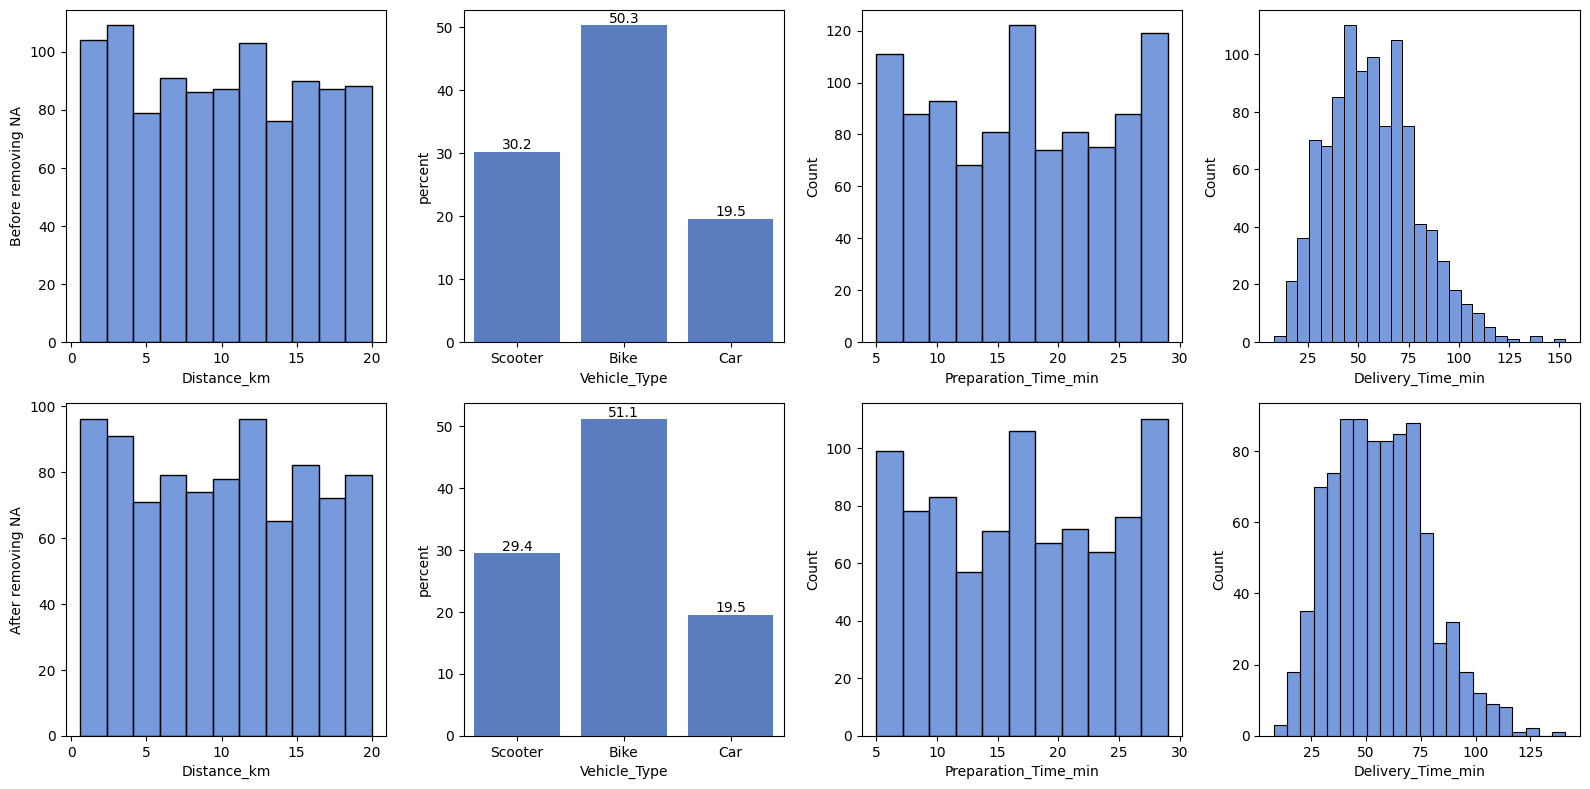

In [ ]:
# 3. show before and after removing NA in NoNA_list columns
fig, ax = plt.subplots(2, len(NoNA_list), figsize=(16, 8))

# Viz before removing NA
for i, var in enumerate(NoNA_list):
  if i == 0:
    ax[0, i].set_ylabel("Before removing NA")

  if var in qual_cols:
    sns.countplot(data=data, x=var, ax=ax[0, i], stat='percent')
    ax[0, i].bar_label(ax[0, i].containers[0])
  else:
    sns.histplot(data=data, x=var, ax=ax[0, i])

# Viz after removing NA
for i, var in enumerate(NoNA_list):
  if i == 0:
    ax[1, i].set_ylabel("After removing NA")

  if var in qual_cols:
    sns.countplot(data=data.dropna(), x =var, ax=ax[1, i], stat='percent')
    ax[1, i].bar_label(ax[1, i].containers[0], fmt='%.1f')
  else:
    sns.histplot(data=data.dropna(), x=var, ax=ax[1, i])

plt.tight_layout()

In [ ]:
# Statistical summary in NoNA_list
  # Before
data.describe().drop(columns=['Courier_Experience_yrs'])

,Distance_km,Preparation_Time_min,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,56.732000
std,5.696656,7.204553,22.070915
min,0.590000,5.000000,8.000000
25%,5.105000,11.000000,41.000000
50%,10.190000,17.000000,55.500000
75%,15.017500,23.000000,71.000000
max,19.990000,29.000000,153.000000


In [ ]:
  # After
data.dropna().describe().drop(columns=['Courier_Experience_yrs'])

,Distance_km,Preparation_Time_min,Delivery_Time_min
count,883.000000,883.000000,883.000000
mean,10.051586,17.019253,56.425821
std,5.688582,7.260201,21.568482
min,0.590000,5.000000,8.000000
25%,5.130000,11.000000,41.000000
50%,10.280000,17.000000,55.000000
75%,15.025000,23.000000,71.000000
max,19.990000,29.000000,141.000000


> 5. Based on the Visualization and the Statistical Summary Before and After removing missing values, we can conclude that the nature of the missing values is <b>Missing Completely at Random (MCAR)</b>.

> 6. The main reason that leads to this conclusion is:
> - The trend in the visualization seems to not change as much after removing NA
> - The statistical summary remains *almost* exactly the same both before and after, including the mean, std, min, max, and its quantiles. Only just very minor differences
> ##### Thus, we can include that the missing values were missing completely at random, and are not related to or because of other columns.

> 7. Since the missing values consist of only 3% in each columns, **and** based on our reasoning in *B.6* that the impact after removing all missing values are very minimal, we can drop all missing values in this dataset.

In [ ]:
cleaned_data = data.dropna()

**C. Analyzing Connections Between Columns**

1. *Impact of Weather on Delivery Time*: determine if weather conditions affect delivery time.

2. *Influence of Traffic Level*: determine whether traffic levels impact delivery time?

3. *Effect of Vehicle Type*: How can we evaluate if the type of vehicle used influences delivery time?

4. *Role of Distance*: How can we analyze the relationship between distance and delivery time?

> ***Hint:** You can extract such a relation by visualizing two variables at the same time. For example, the impact of `Weather` on `Delivery Time` can be visualized using graph that describe `Delivery Time` within each `Weather` condition. Conditional Boxplot is a good option for such task (shown below).*

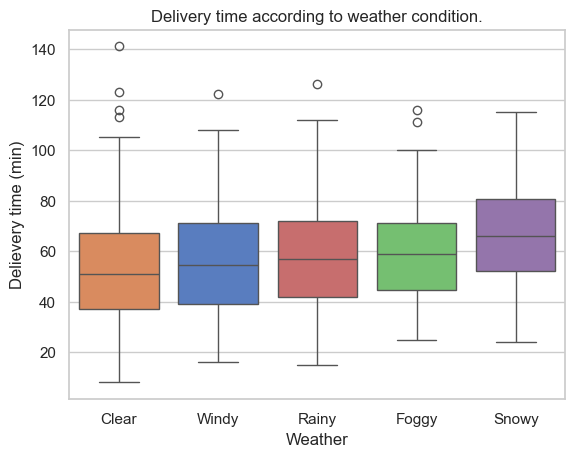

In [ ]:
# To do

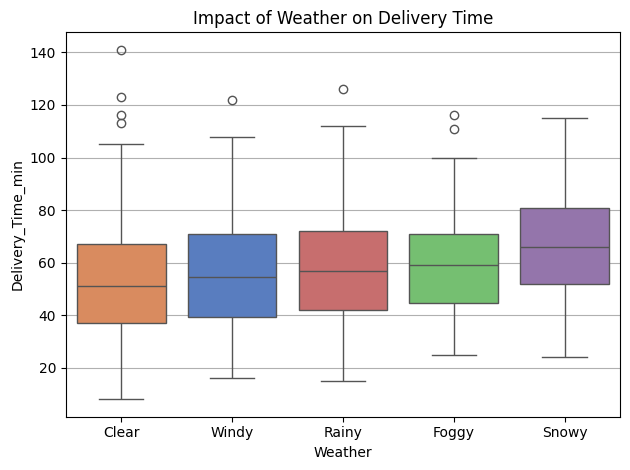

In [ ]:
# 1. Impact of Weather on Delivery Time

# cleaned_data.groupby('Weather')['Delivery_Time_min'].mean().sort_values().index
sns.boxplot(data=cleaned_data, x='Weather', y='Delivery_Time_min', hue='Weather', palette='muted', legend=False, order=cleaned_data.groupby('Weather')['Delivery_Time_min'].mean().sort_values().index)
plt.grid(axis='y')
plt.title("Impact of Weather on Delivery Time")
plt.tight_layout()


> Weather does affect delivery time, and also logical that Clear weather contributes to lower delivery time, followed by windy, rainy, and foggy, while snowy may make delivery time longer

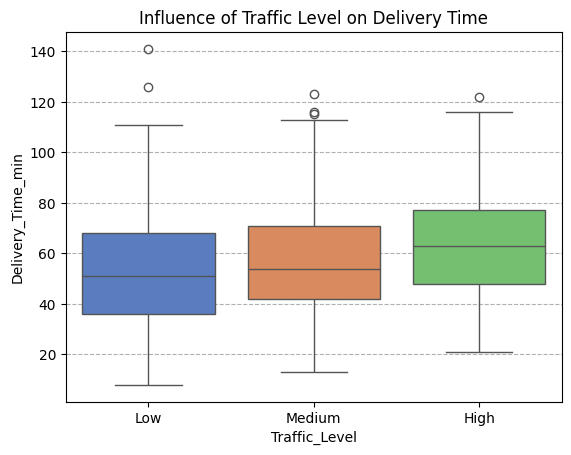

In [ ]:
# 2. Influence of Traffic Level: determine whether traffic levels impact delivery time?

sns.boxplot(cleaned_data, x='Traffic_Level', y='Delivery_Time_min', hue='Traffic_Level', palette='muted', legend=False)
plt.title("Influence of Traffic Level on Delivery Time")
plt.grid(axis='y', linestyle='--')

> Traffic Level does influence Delivery Time, as can be seen, on average 50mns delivery time with Low traffic, then 50\~mns with Medium, and 60\~mns with High traffic.

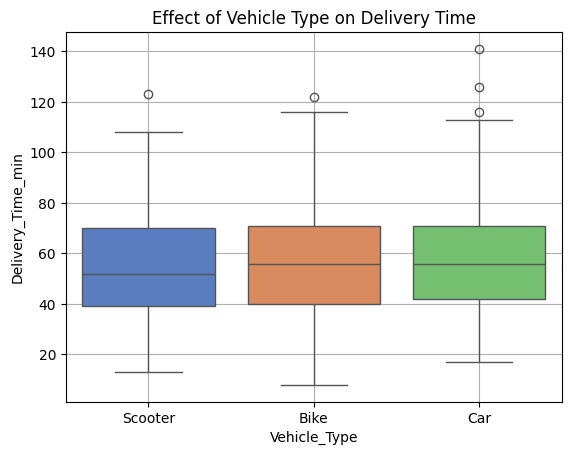

In [ ]:
# 3. Effect of Vehicle Type: How can we evaluate if the type of vehicle used influences delivery time?
sns.boxplot(cleaned_data, x='Vehicle_Type', y='Delivery_Time_min', hue='Vehicle_Type', palette='muted', legend=False)
plt.title("Effect of Vehicle Type on Delivery Time")
plt.grid()

> Surprisingly, Vehicle Type doesn't really affect the delivery time, though scooter takes a bit of a win here.<br>
> (Assumption) This may be because of the delivery company's algorithm for allowing Bike to deliver more closer range deliveries.


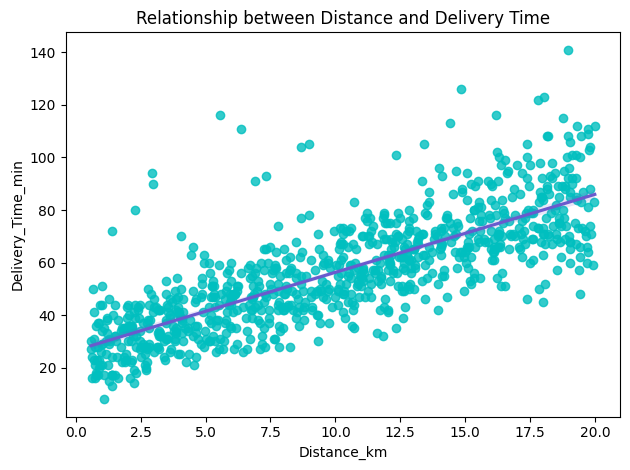

The Correlation Coefficient is 0.78
This is a strong, positive linear relation


In [ ]:
# 4. Role of Distance: How can we analyze the relationship between distance and delivery time?
  # comparing 2 quan columns: scatter/regplot is good
sns.regplot(cleaned_data, x='Distance_km', y='Delivery_Time_min',
            scatter_kws={'color': 'c'},
            line_kws={'color': 'slateblue'})

plt.title("Relationship between Distance and Delivery Time")
plt.tight_layout()
plt.show()

r_correlation = cleaned_data['Distance_km'].corr(cleaned_data['Delivery_Time_min'])

print(f"The Correlation Coefficient is {r_correlation:.2f}")
print(f"This is a strong, positive linear relation")

> With a Correlation Coefficient (r) of 0.78, this suggests a strong positive relationship between distance and delivery time. This strongly suggests that the longer the distance, the longer the delivery time.

# **Further Reading**

- `Pandas` python library: [https://pandas.pydata.org/docs/getting_started/index.html#getting-started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

- `Pandas Cheatsheet`: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- `10 Minute to Pandas`: [https://pandas.pydata.org/docs/user_guide/10min.html](https://pandas.pydata.org/docs/user_guide/10min.html)

- `Some Pandas Lession`: [https://www.kaggle.com/learn/pandas](https://pandas.pydata.org/docs/user_guide/10min.html)